In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.filters.hp_filter import hpfilter

def plot_time_series(df, time_col='READ_DATE', value_col='KWH_EXP', title='', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7)):
    df_local = df.copy()
    df_local[time_col] = pd.to_datetime(df_local[time_col])
    df_local.set_index(time_col, inplace=True)
    
    plt.figure(figsize=figsize)
    sns.lineplot(data=df_local, x=df_local.index, y=value_col)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
def adf_test(df, time_col='READ_DATE', value_col='KWH_EXP'):
    df_local = df.copy()
    df_local[time_col] = pd.to_datetime(df_local[time_col])
    df_local.set_index(time_col, inplace=True)
    
    result = adfuller(df_local[value_col].dropna())
    tstat = result[0]
    pvalue = result[1]
    
    print(f'ADF Statistic: {tstat}')
    print(f'p-value: {pvalue}')
    
    if pvalue < 0.05:
        print("Reject the null hypothesis - the time series is stationary.")
    else:
        print("Fail to reject the null hypothesis - the time series is non-stationary.")

    return tstat, pvalue

def plot_weather_data(df, time_col='Tanggal', categories=['Tavg', 'RH_avg', 'RR', 'ss'], figsize=(14, 7)):
    df_local = df.copy()
    df_local[time_col] = pd.to_datetime(df_local[time_col])
    df_local.set_index(time_col, inplace=True)
    
    for category in categories:
        plt.figure(figsize=figsize)
        sns.lineplot(data=df_local, x=df_local.index, y=category)
        plt.title(f'{category} over Time')
        plt.xlabel(time_col)
        plt.ylabel(category)
        plt.grid(True)
        plt.show()

def plot_decomposition(df, time_col='READ_DATE', value_col='KWH_EXP', figsize=(14, 7)):
    df_local = df.copy()
    df_local[time_col] = pd.to_datetime(df_local[time_col])
    df_local.set_index(time_col, inplace=True)
    
    lambda_daily_365 = 1600 * (365 / 4) ** 4
    cycle, trend = hpfilter(df_local[value_col], lamb=lambda_daily_365)
    df_local['trend'] = trend
    df_local['cycle'] = cycle
    
    # Plot original, trend, and cycle together
    plt.figure(figsize=figsize)
    sns.lineplot(data=df_local, x=df_local.index, y=value_col, label='Original')
    sns.lineplot(data=df_local, x=df_local.index, y='trend', label='Trend')
    sns.lineplot(data=df_local, x=df_local.index, y='cycle', label='Cycle')
    plt.title('Decomposition of Time Series')
    plt.xlabel(time_col)
    plt.ylabel(value_col)
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Plot trend separately
    plt.figure(figsize=figsize)
    sns.lineplot(data=df_local, x=df_local.index, y='trend', label='Trend')
    plt.title('Trend Component')
    plt.xlabel(time_col)
    plt.ylabel('Trend')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Plot cycle separately
    plt.figure(figsize=figsize)
    sns.lineplot(data=df_local, x=df_local.index, y='cycle', label='Cycle')
    plt.title('Cycle Component')
    plt.xlabel(time_col)
    plt.ylabel('Cycle')
    plt.grid(True)
    plt.legend()
    plt.show()

In [3]:
# 442100110323
df1_15 = pd.read_csv('processed/442100110323_standard.csv')
df1_hourly = pd.read_csv('processed/442100110323_hourly.csv')
df1_daily = pd.read_csv('processed/442100110323_daily.csv')

# 442100118673
df2_15 = pd.read_csv('processed/442100118673_standard.csv')
df2_hourly = pd.read_csv('processed/442100118673_hourly.csv')
df2_daily = pd.read_csv('processed/442100118673_daily.csv')

# 442300169800
df3_15 = pd.read_csv('processed/442300169800_standard.csv')
df3_hourly = pd.read_csv('processed/442300169800_hourly.csv')
df3_daily = pd.read_csv('processed/442300169800_daily.csv')

# 442300170322
df4_15 = pd.read_csv('processed/442300170322_standard.csv')
df4_hourly = pd.read_csv('processed/442300170322_hourly.csv')
df4_daily = pd.read_csv('processed/442300170322_daily.csv')

# 442400146024
df5_15 = pd.read_csv('processed/442400146024_standard.csv')
df5_hourly = pd.read_csv('processed/442400146024_hourly.csv')
df5_daily = pd.read_csv('processed/442400146024_daily.csv')

#### Grafik visualisasi konsumsi Listrik per pelanggan yang 15 menit, hourly dan daily

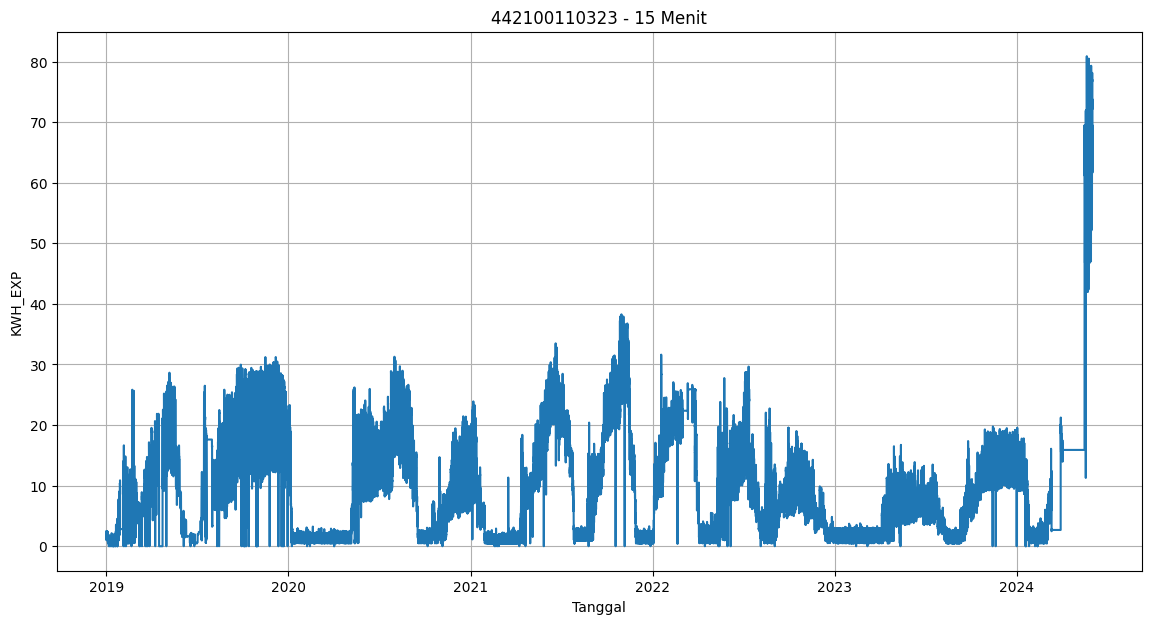

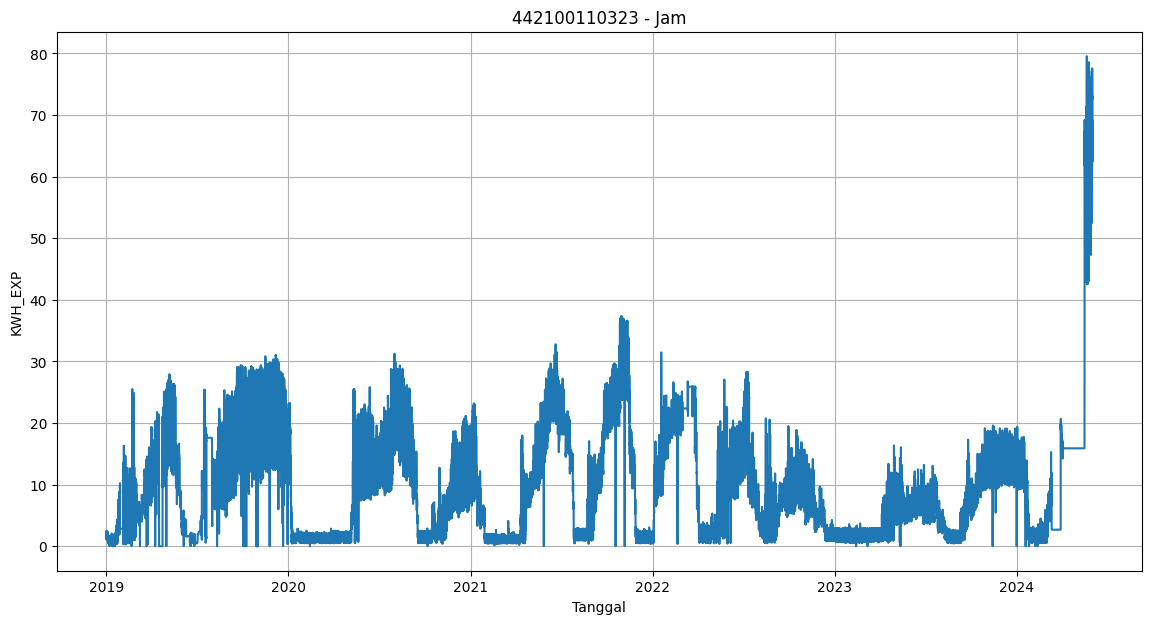

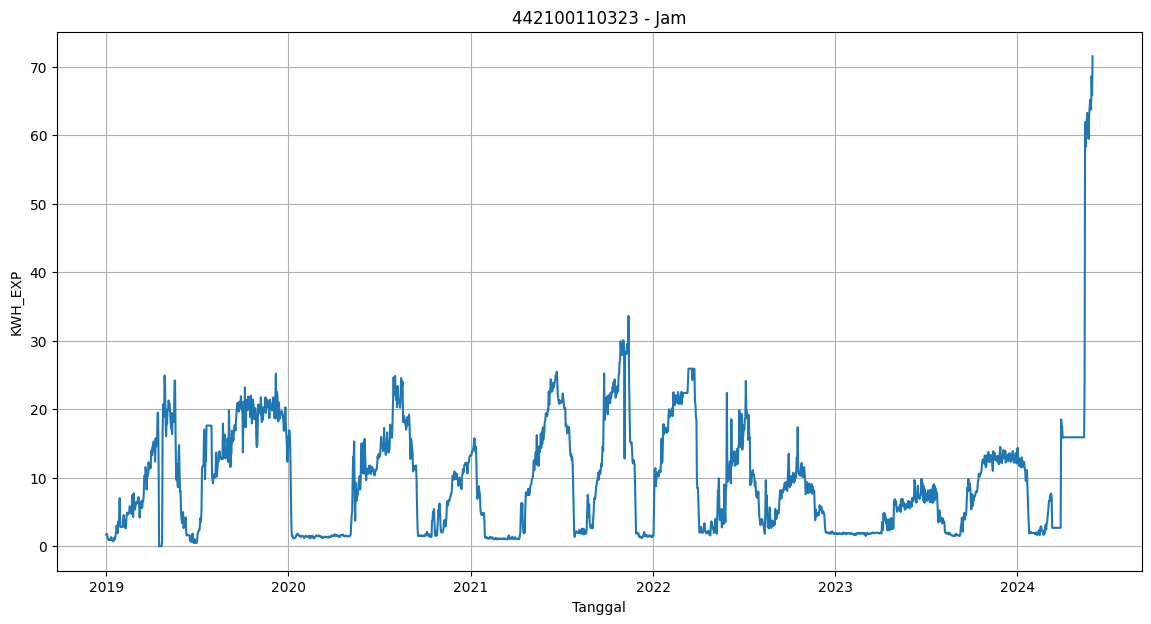

In [4]:
plot_time_series(df1_15, title='442100110323 - 15 Menit', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))
plot_time_series(df1_hourly, title='442100110323 - Jam', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))
plot_time_series(df1_daily, title='442100110323 - Jam', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))

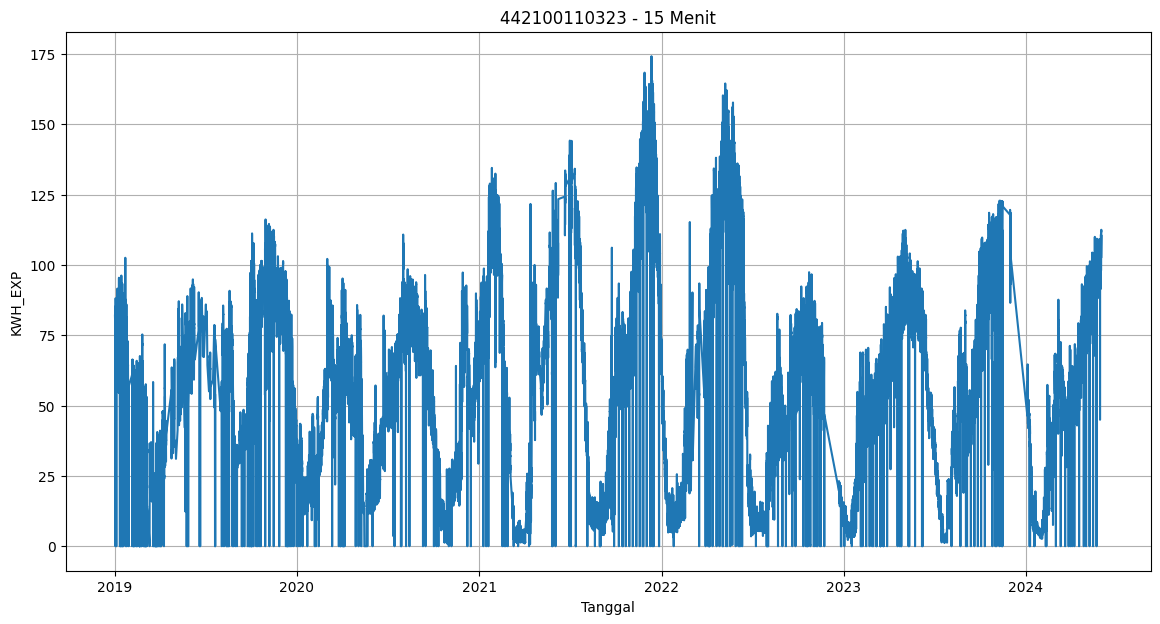

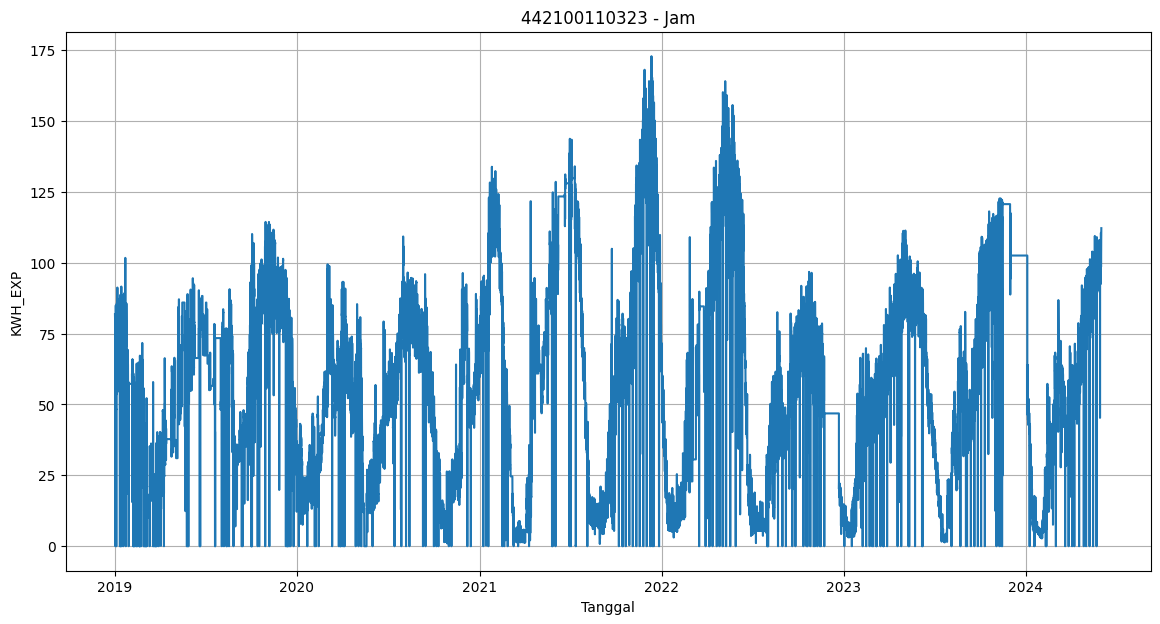

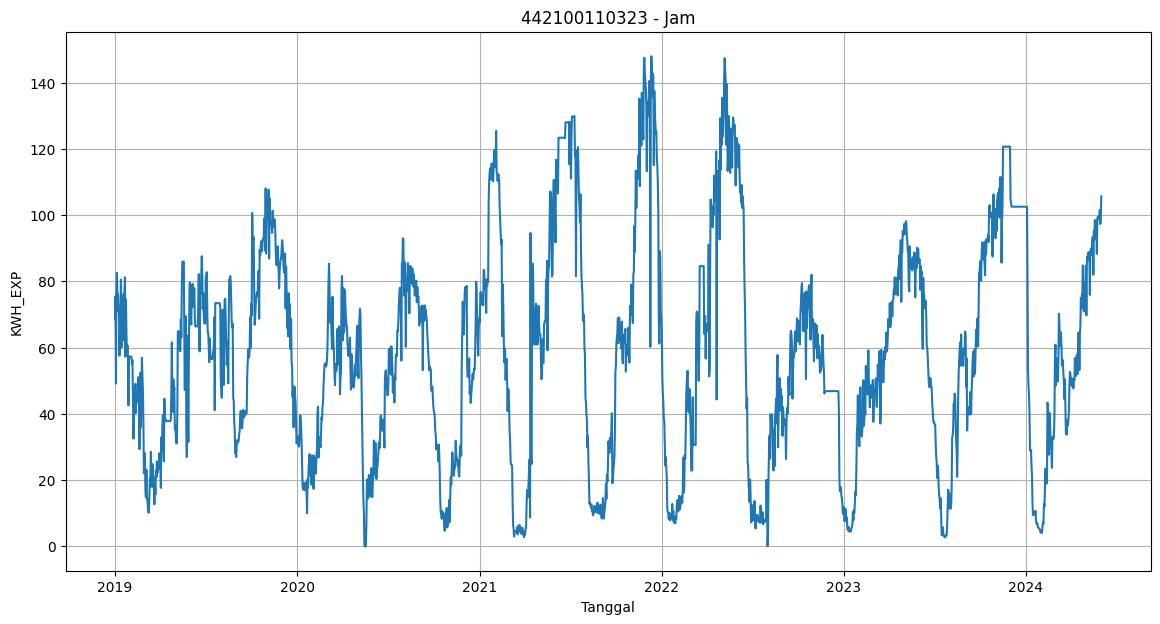

In [5]:
plot_time_series(df2_15, title='442100110323 - 15 Menit', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))
plot_time_series(df2_hourly, title='442100110323 - Jam', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))
plot_time_series(df2_daily, title='442100110323 - Jam', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))

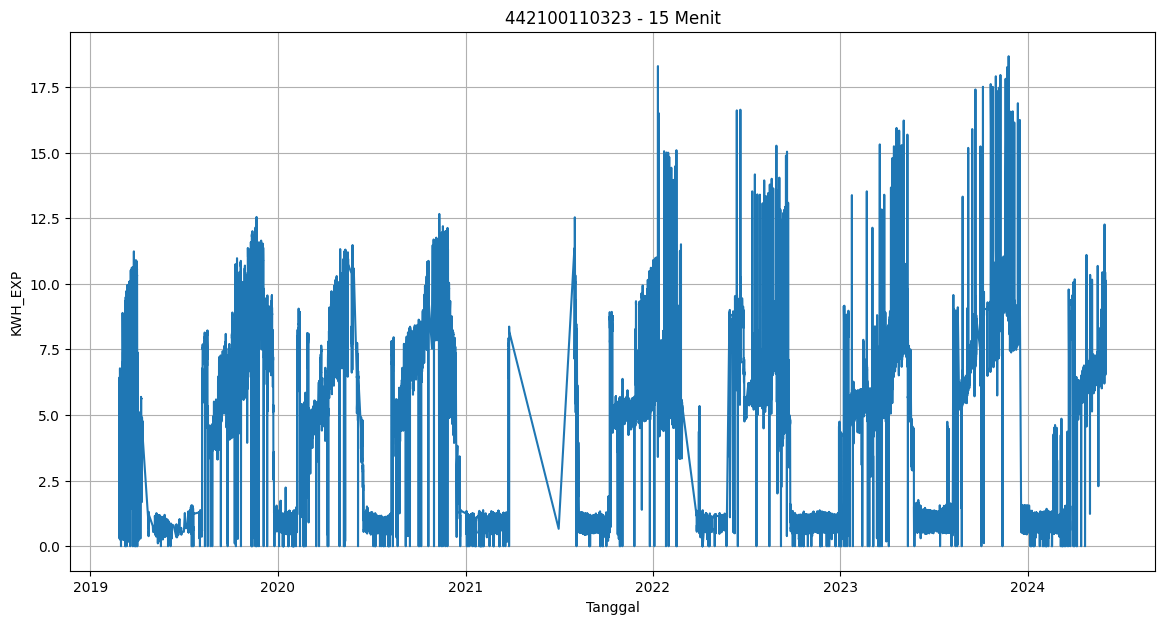

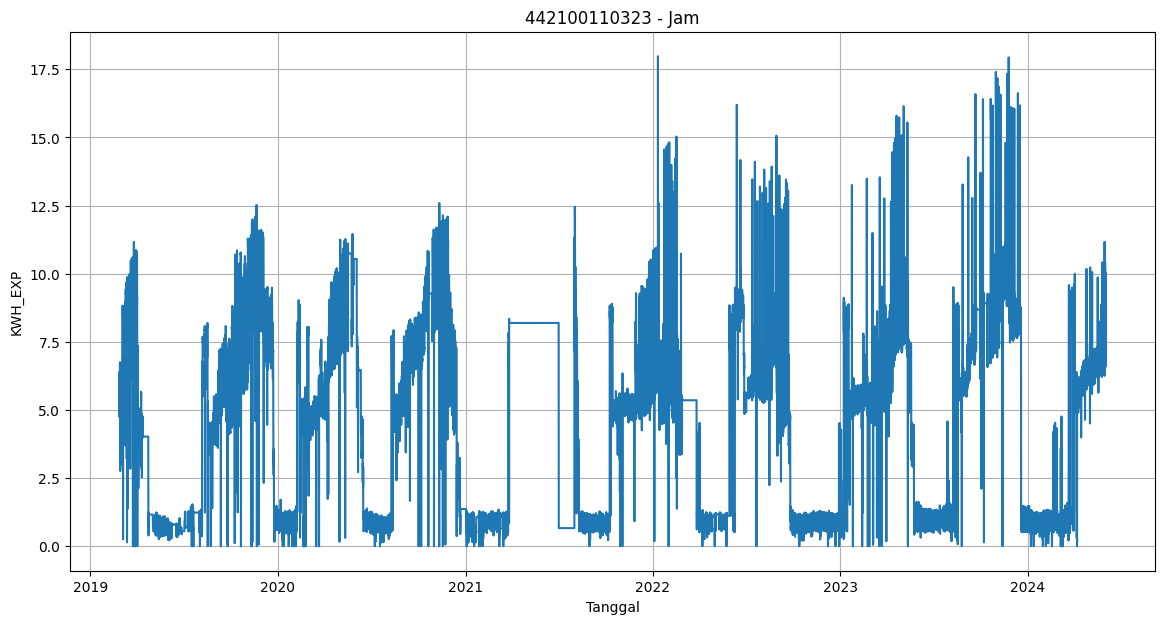

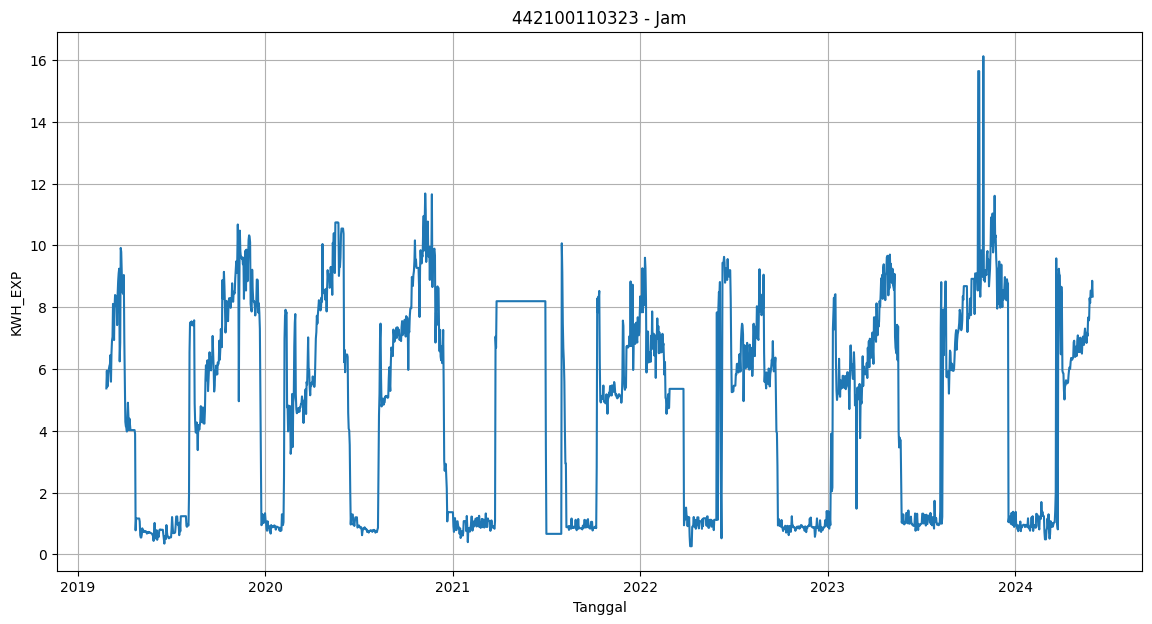

In [6]:
plot_time_series(df3_15, title='442100110323 - 15 Menit', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))
plot_time_series(df3_hourly, title='442100110323 - Jam', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))
plot_time_series(df3_daily, title='442100110323 - Jam', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))

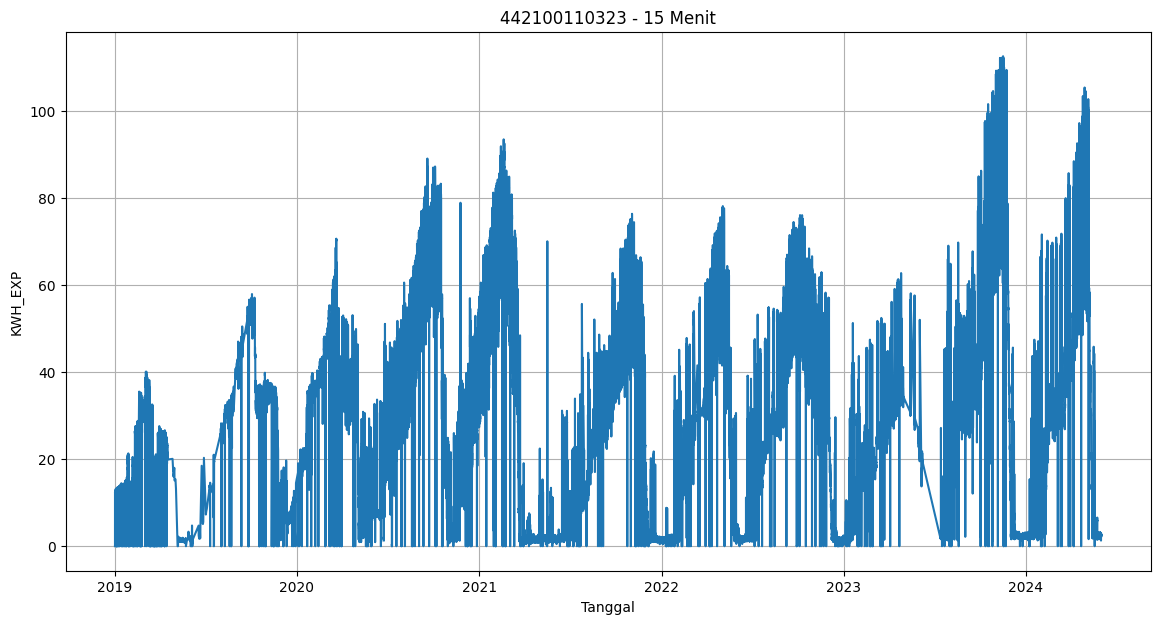

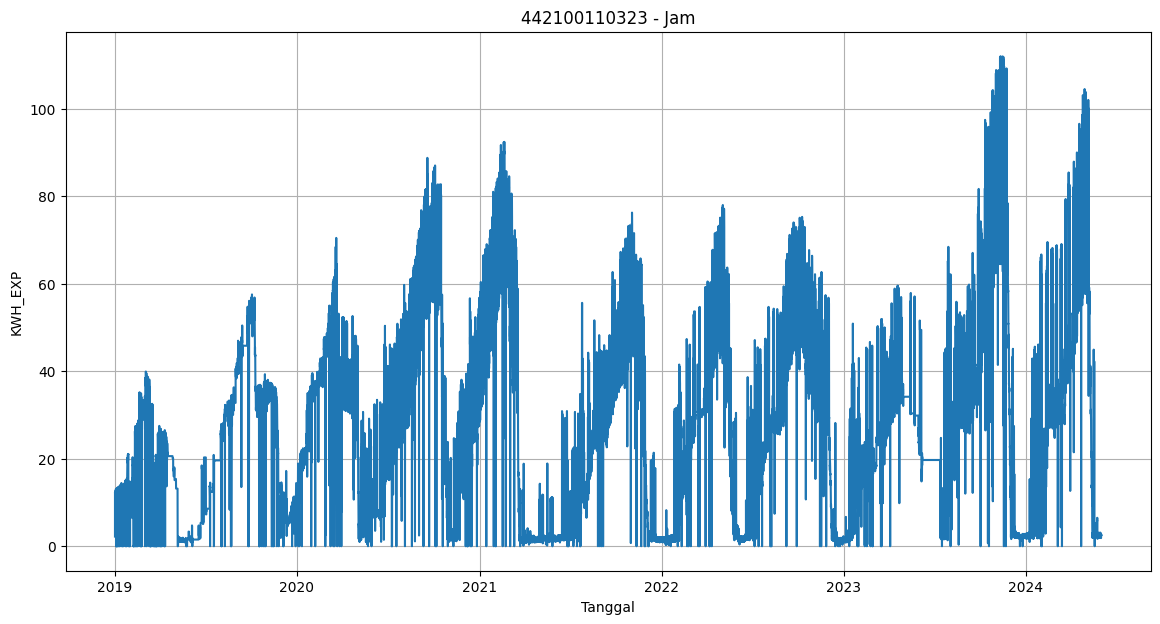

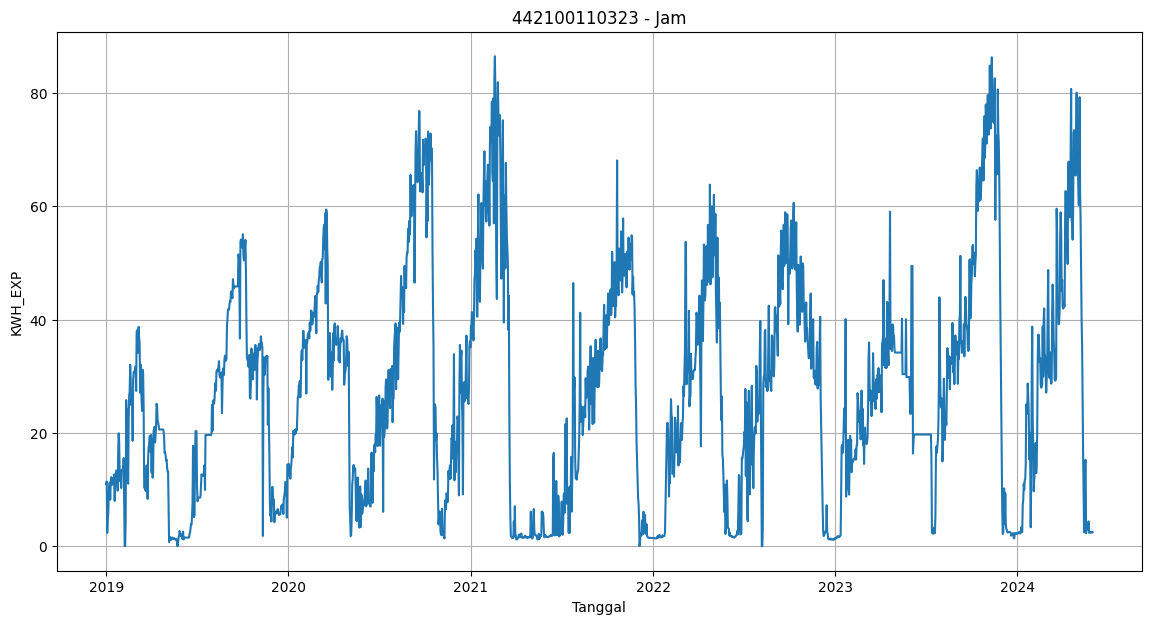

In [7]:
plot_time_series(df4_15, title='442100110323 - 15 Menit', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))
plot_time_series(df4_hourly, title='442100110323 - Jam', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))
plot_time_series(df4_daily, title='442100110323 - Jam', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))

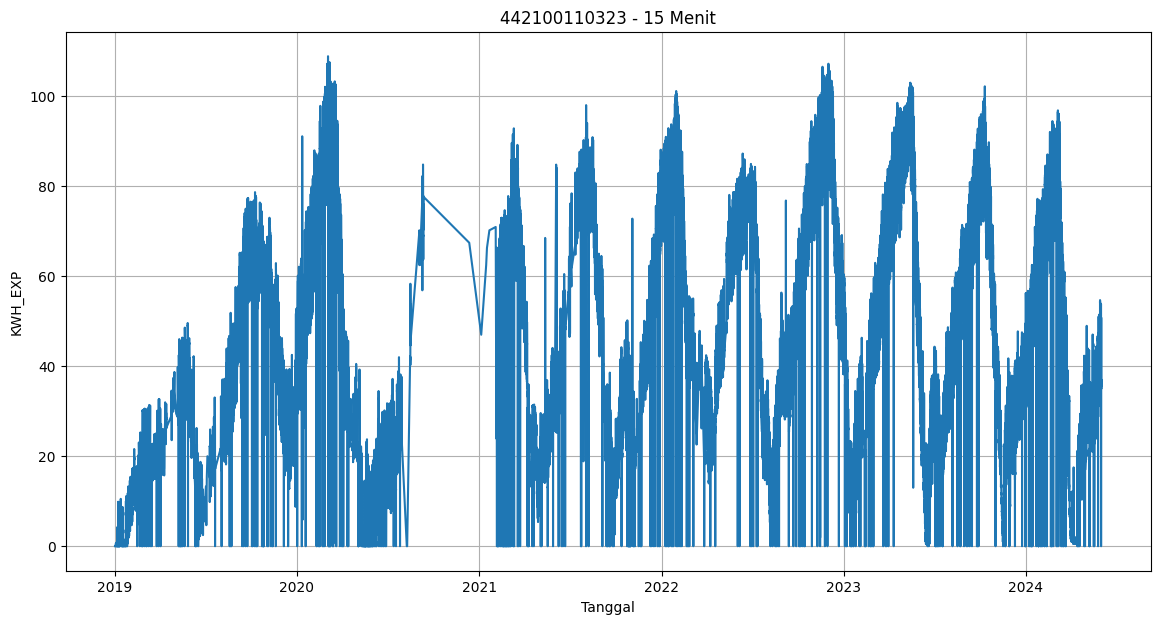

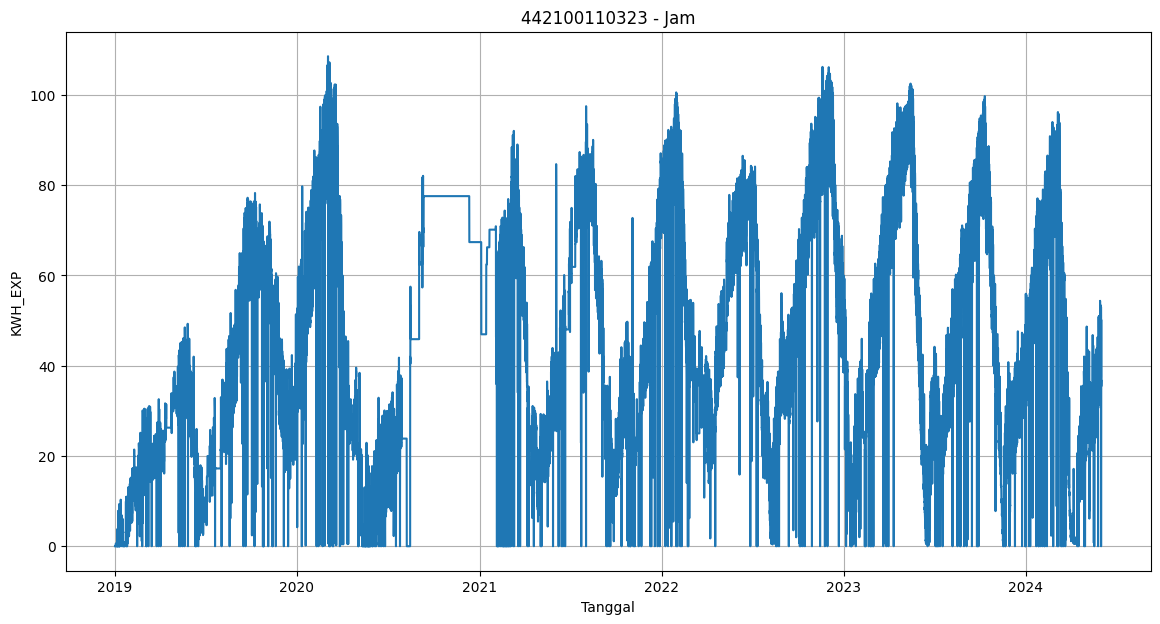

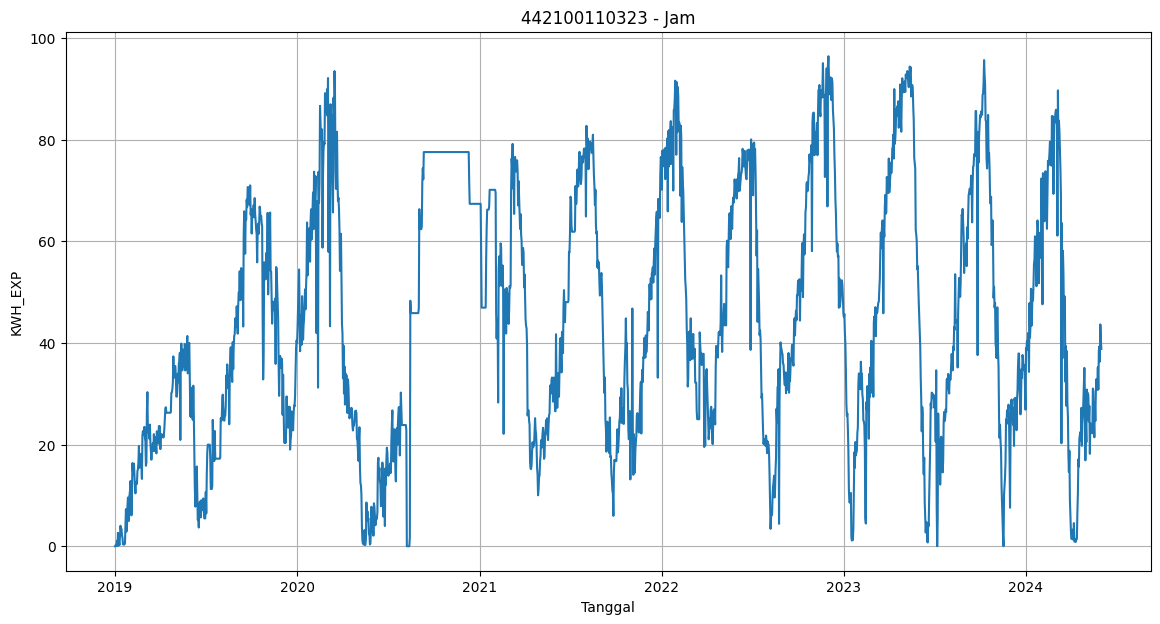

In [8]:
plot_time_series(df5_15, title='442100110323 - 15 Menit', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))
plot_time_series(df5_hourly, title='442100110323 - Jam', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))
plot_time_series(df5_daily, title='442100110323 - Jam', xlabel='Tanggal', ylabel='KWH_EXP', figsize=(14, 7))

#### Nilai uji stationer ADF (tstat & pvalue) per pelanggan


In [9]:
print("442100110323 - 15 Menit")
tstat1_15, pvalue1_15 = adf_test(df1_15)
print("442100110323 - Jam")
tstat1_hourly, pvalue1_hourly = adf_test(df1_hourly)
print("442100110323 - Hari")
tstat1_daily, pvalue1_daily = adf_test(df1_daily)

442100110323 - 15 Menit
ADF Statistic: -3.371997432529708
p-value: 0.0119513332075292
Reject the null hypothesis - the time series is stationary.
442100110323 - Jam
ADF Statistic: -2.3414082368231885
p-value: 0.15896044422025662
Fail to reject the null hypothesis - the time series is non-stationary.
442100110323 - Hari
ADF Statistic: -2.8621436023148035
p-value: 0.04993060620639895
Reject the null hypothesis - the time series is stationary.


In [10]:
print("442100118673 - 15 Menit")
tstat2_15, pvalue2_15 = adf_test(df2_15)
print("442100118673 - Jam")
tstat2_hourly, pvalue2_hourly = adf_test(df2_hourly)
print("442100118673 - Hari")
tstat2_daily, pvalue2_daily = adf_test(df2_daily)

442100118673 - 15 Menit
ADF Statistic: -6.6403623913390355
p-value: 5.429315037182405e-09
Reject the null hypothesis - the time series is stationary.
442100118673 - Jam
ADF Statistic: -4.352649110213078
p-value: 0.0003596560449284525
Reject the null hypothesis - the time series is stationary.
442100118673 - Hari
ADF Statistic: -6.749133132785049
p-value: 2.9819444404694114e-09
Reject the null hypothesis - the time series is stationary.


In [11]:
print("442300169800 - 15 Menit")
tstat3_15, pvalue3_15 = adf_test(df3_15)
print("442300169800 - Jam")
tstat3_hourly, pvalue3_hourly = adf_test(df3_hourly)
print("442300169800 - Hari")
tstat3_daily, pvalue3_daily = adf_test(df3_daily)

442300169800 - 15 Menit
ADF Statistic: -6.564134866327254
p-value: 8.239805066774135e-09
Reject the null hypothesis - the time series is stationary.
442300169800 - Jam
ADF Statistic: -5.776144219375973
p-value: 5.254008411676161e-07
Reject the null hypothesis - the time series is stationary.
442300169800 - Hari
ADF Statistic: -4.4789939781742145
p-value: 0.0002145588423679175
Reject the null hypothesis - the time series is stationary.


In [12]:
print("442300170322 - 15 Menit")
tstat4_15, pvalue4_15 = adf_test(df4_15)
print("442300170322 - Jam")
tstat4_hourly, pvalue4_hourly = adf_test(df4_hourly)
print("442300170322 - Hari")
tstat4_daily, pvalue4_daily = adf_test(df4_daily)

442300170322 - 15 Menit
ADF Statistic: -8.235635883597231
p-value: 5.900626404615819e-13
Reject the null hypothesis - the time series is stationary.
442300170322 - Jam
ADF Statistic: -5.500461588832381
p-value: 2.076909985088589e-06
Reject the null hypothesis - the time series is stationary.
442300170322 - Hari
ADF Statistic: -5.37844681061428
p-value: 3.7587542184661024e-06
Reject the null hypothesis - the time series is stationary.


In [13]:
print("442400146024 - 15 Menit")
tstat5_15, pvalue5_15 = adf_test(df5_15)
print("442400146024 - Jam")
tstat5_hourly, pvalue5_hourly = adf_test(df5_hourly)
print("442400146024 - Hari")
tstat5_daily, pvalue5_daily = adf_test(df5_daily)

442400146024 - 15 Menit
ADF Statistic: -7.879961224125566
p-value: 4.731816314202132e-12
Reject the null hypothesis - the time series is stationary.
442400146024 - Jam
ADF Statistic: -4.272349636510556
p-value: 0.0004958210170725848
Reject the null hypothesis - the time series is stationary.
442400146024 - Hari
ADF Statistic: -5.44220327110117
p-value: 2.7602478941431826e-06
Reject the null hypothesis - the time series is stationary.


#### Grafik visualisasi cuaca per kategori dan gabungan

In [14]:
bmkg = pd.read_csv('processed/weather_2019_2024_standard.csv')
meteostat = pd.read_csv('processed/442400146024_daily_meteostat.csv')

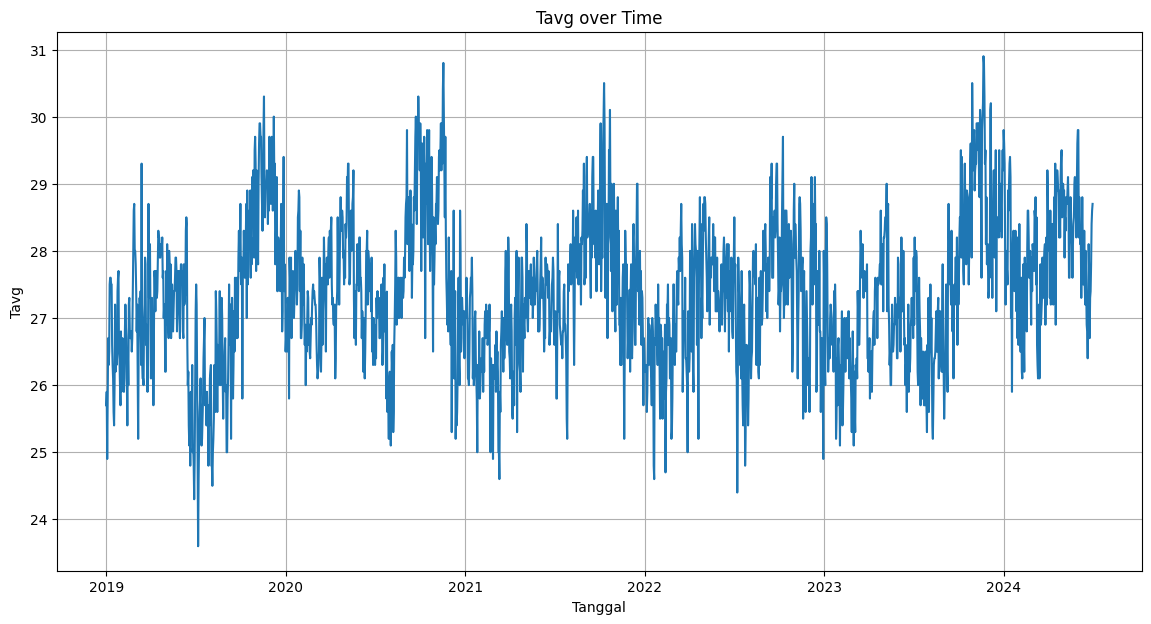

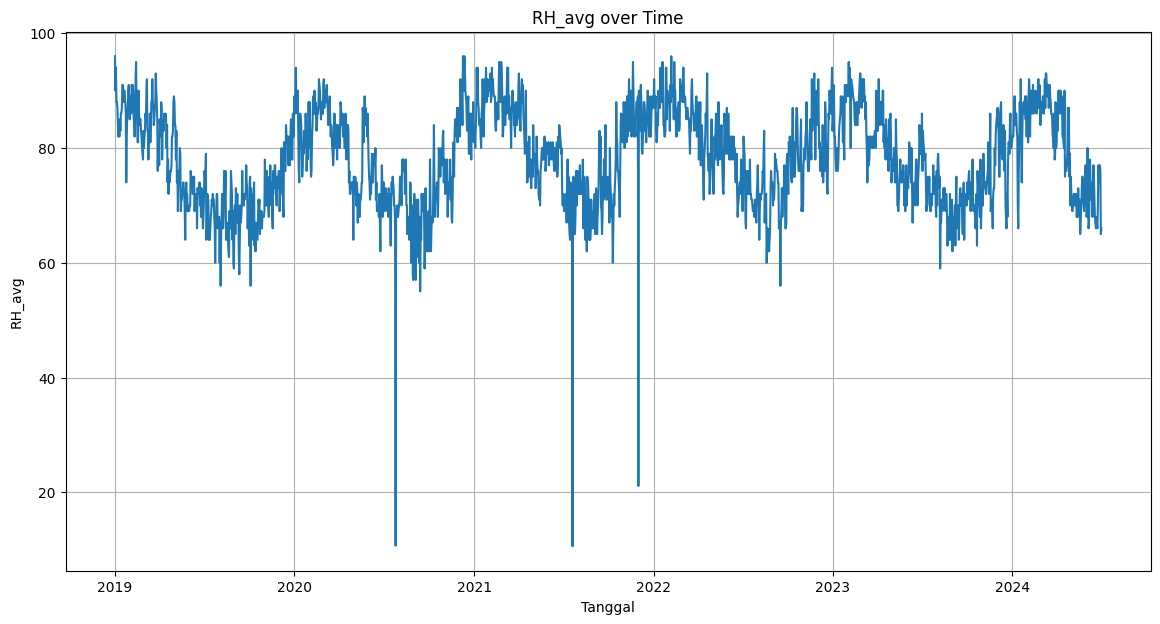

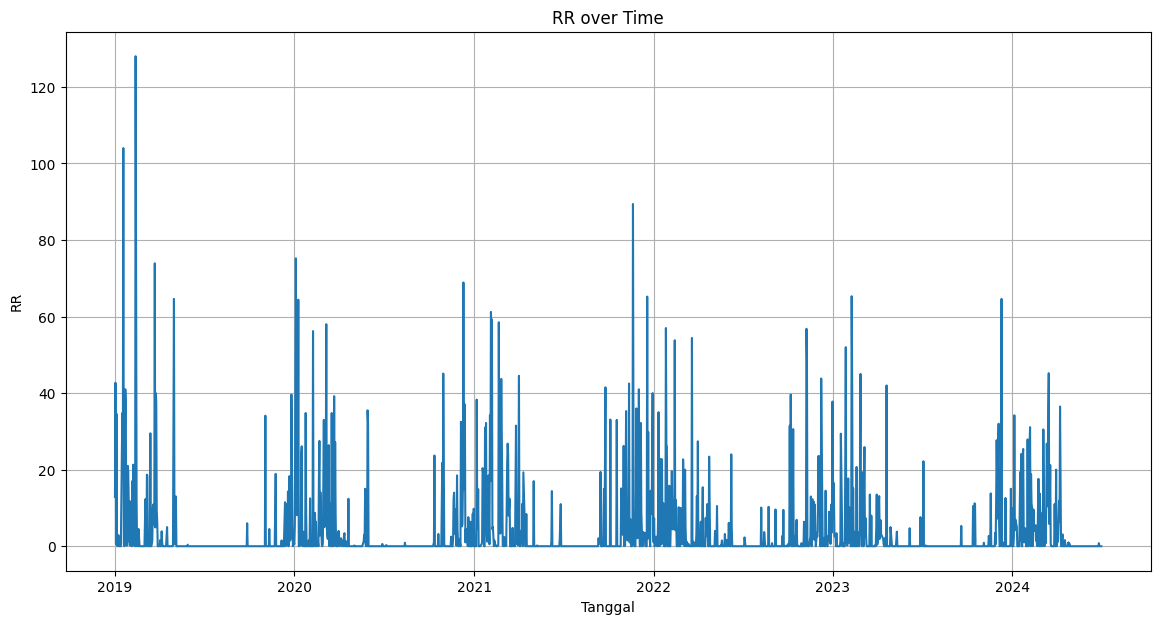

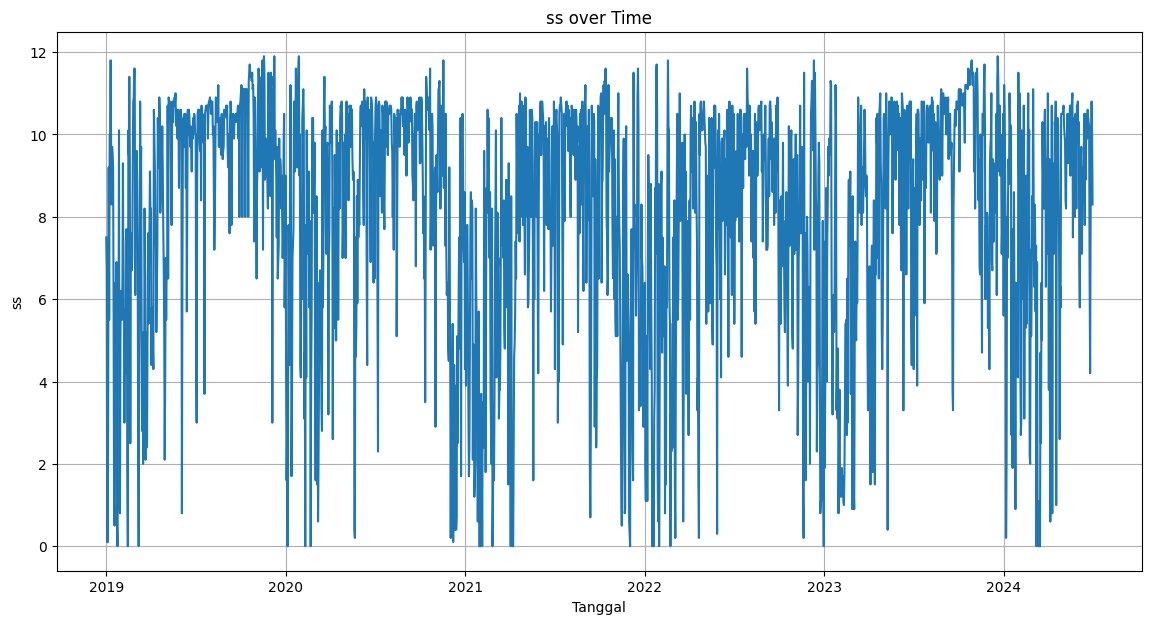

In [15]:
plot_weather_data(bmkg)

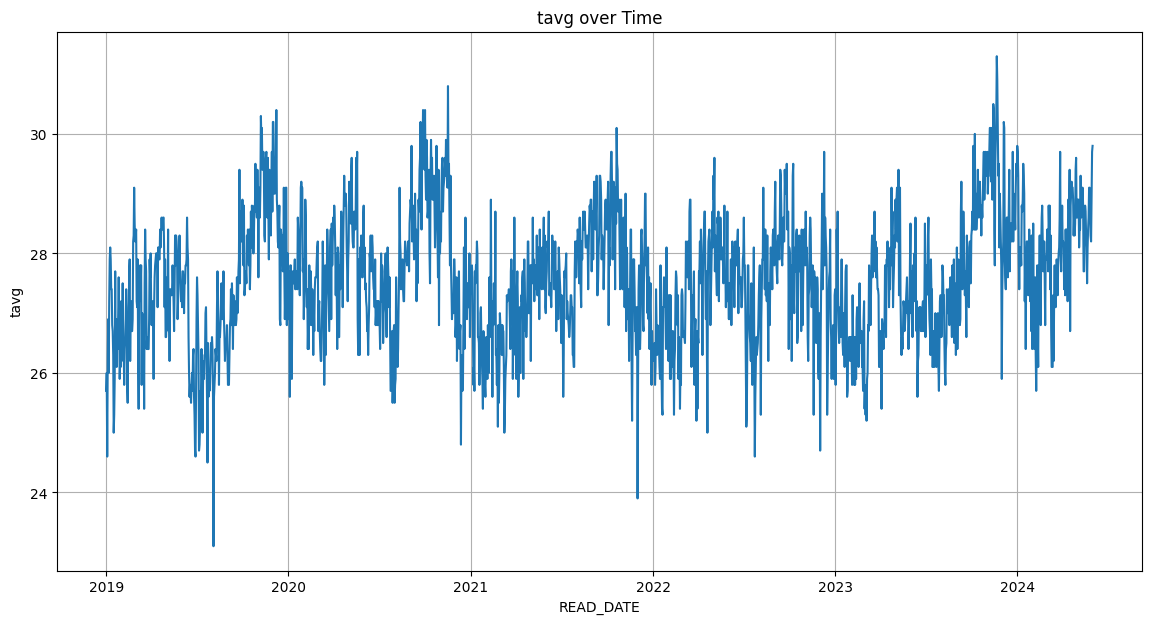

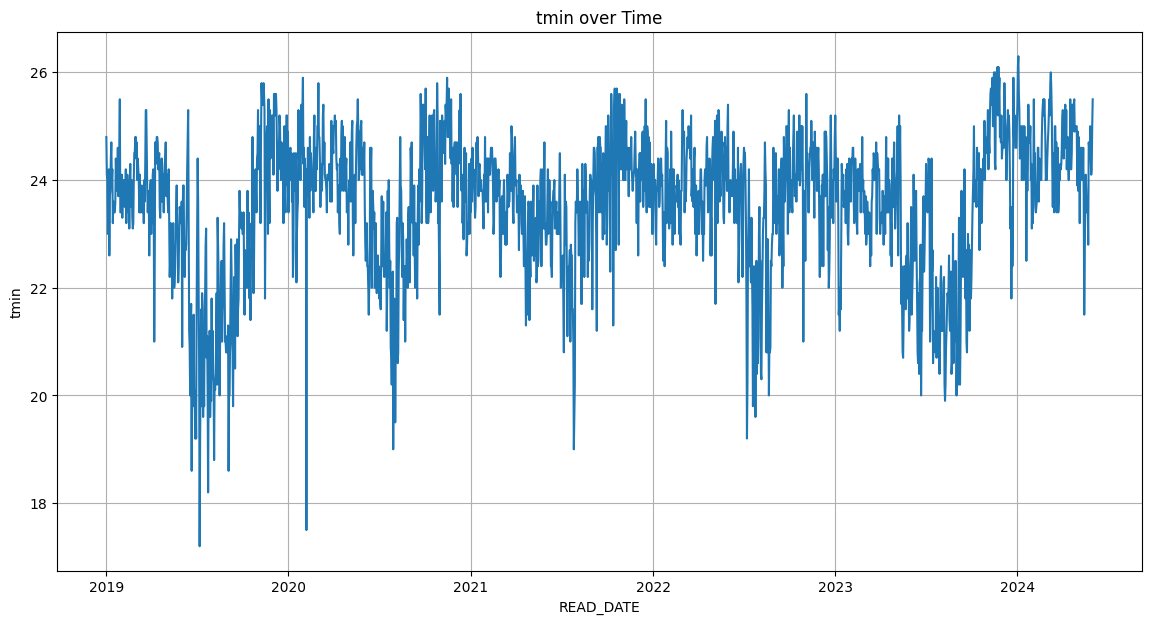

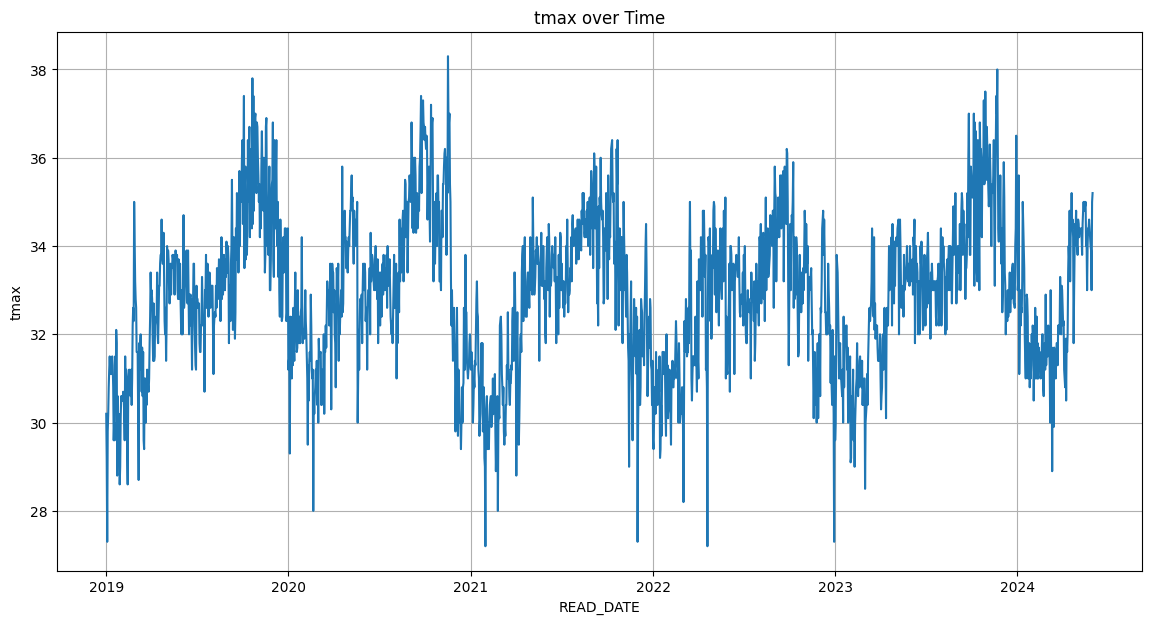

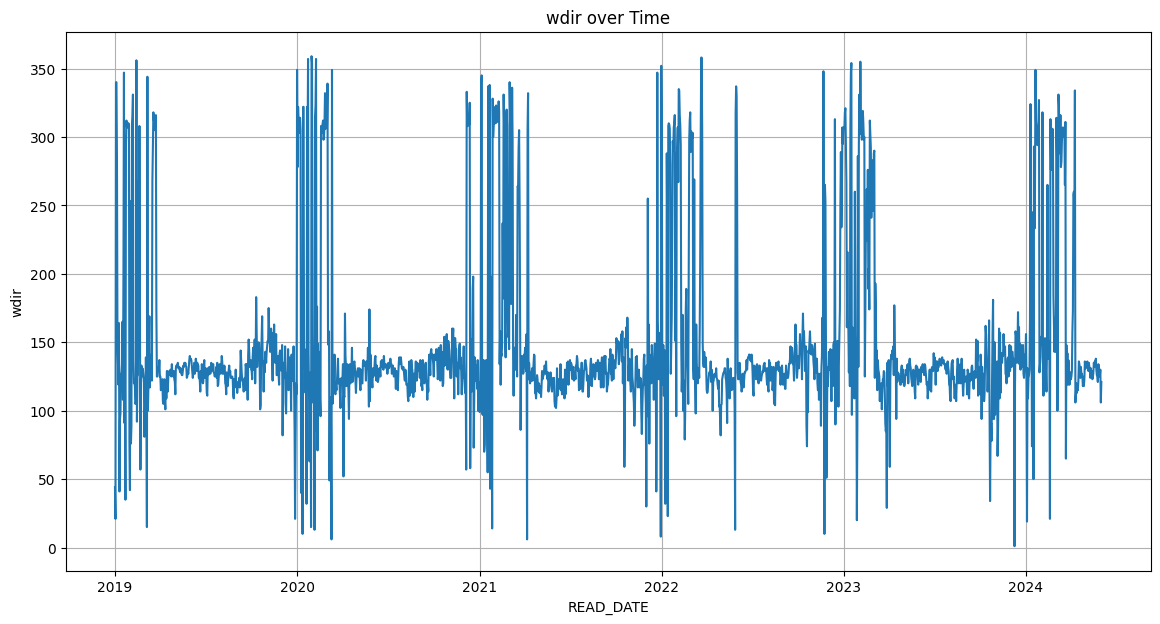

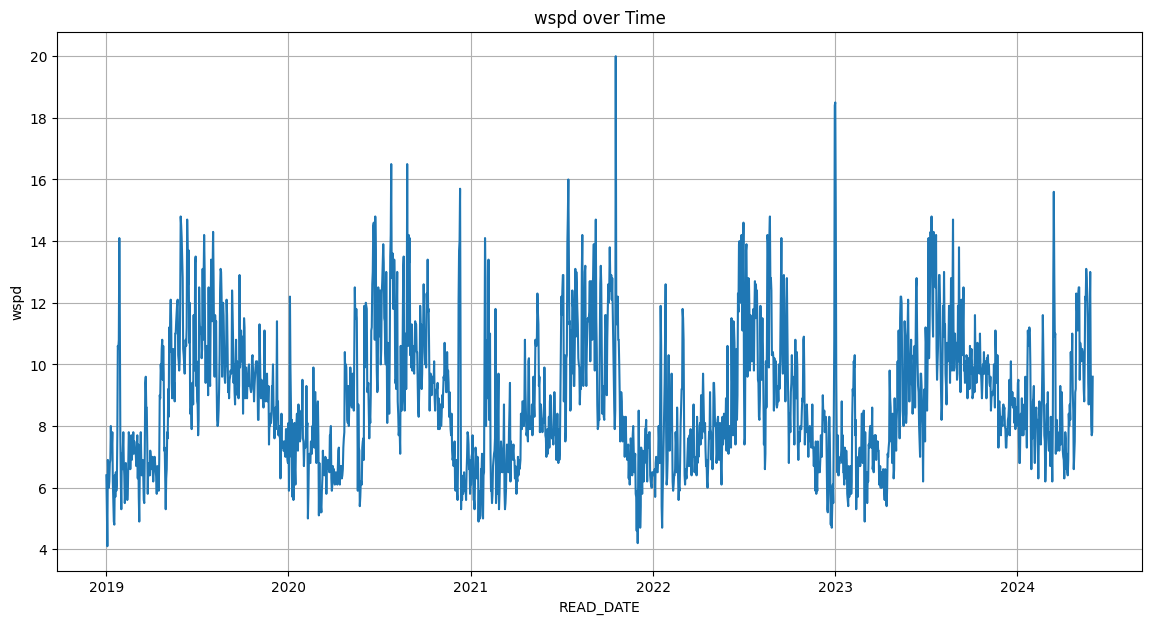

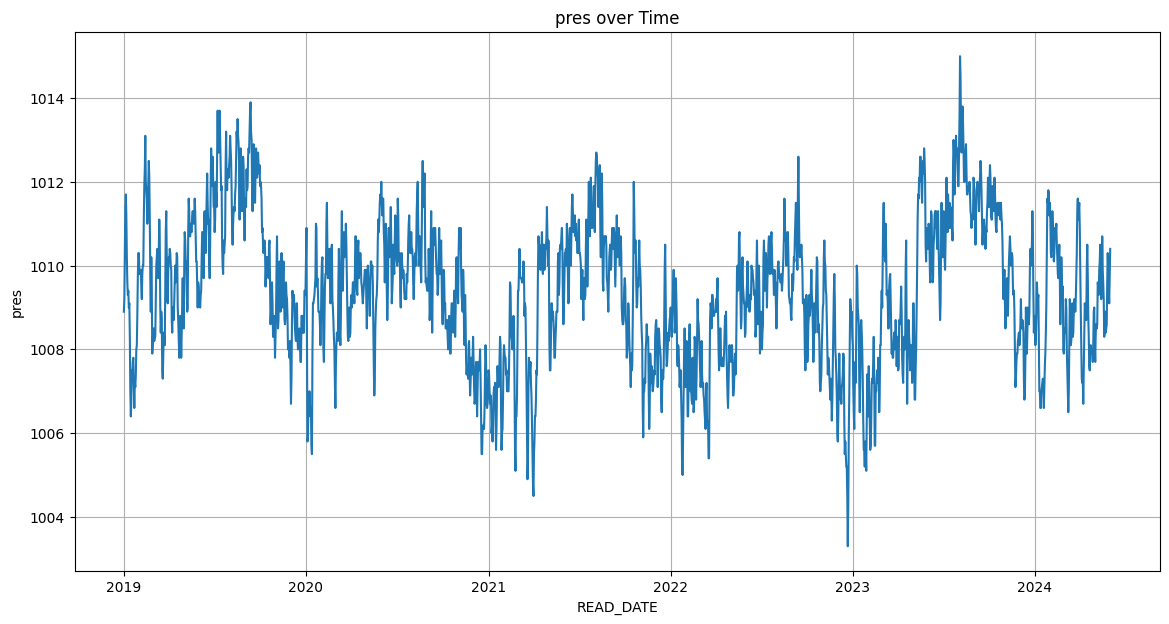

In [16]:
meteostat_cat=['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres']
time = 'READ_DATE'

plot_weather_data(meteostat, time_col=time, categories=meteostat_cat)

#### Jumlah missing values per pelanggan dan per fitur

In [17]:
df1 = pd.read_csv('raw/442100110323-2.csv')
df2 = pd.read_csv('raw/442100118673-2.csv')
df3 = pd.read_csv('raw/442300169800-2.csv')
df4 = pd.read_csv('raw/442300170322-2.csv')
df5 = pd.read_csv('raw/442400146024-2.csv')

In [18]:
pd.set_option('display.max_rows', None)
print(df1.isnull().sum())

ID                           0
REF_NUMBER                   0
LOCATION_CODE                0
SITE_CODE                    0
METER_CODE                   0
PERIODE                      0
READ_DATE                    0
VOLTAGE_L1                   0
VOLTAGE_L2                   0
VOLTAGE_L3                   0
CURRENT_L1                   0
CURRENT_L2                   0
CURRENT_L3                   0
CURRENT_N                10896
POWER_FACTOR_L1          10896
POWER_FACTOR_L2          10896
POWER_FACTOR_L3          10896
POWER_FACTOR_TOTAL           0
ACTIVE_POWER_L1          10896
ACTIVE_POWER_L2          10896
ACTIVE_POWER_L3          10896
ACTIVE_POWER_TOTAL           0
REACTIVE_POWER_L1        10896
REACTIVE_POWER_L2        10896
REACTIVE_POWER_L3        10896
REACTIVE_POWER_TOTAL         0
APPARENT_POWER_L1        10896
APPARENT_POWER_L2        10896
APPARENT_POWER_L3        10896
APPARENT_POWER_TOTAL     10896
KWH_EXPORT_L1            10896
KWH_EXPORT_L2            10896
KWH_EXPO

In [19]:
print(df2.isnull().sum())

ID                           0
REF_NUMBER                   0
LOCATION_CODE                0
SITE_CODE                    0
METER_CODE                   0
PERIODE                      0
READ_DATE                    0
VOLTAGE_L1                   0
VOLTAGE_L2                   0
VOLTAGE_L3                   0
CURRENT_L1                   0
CURRENT_L2                   0
CURRENT_L3                   0
CURRENT_N                 9535
POWER_FACTOR_L1           9535
POWER_FACTOR_L2           9535
POWER_FACTOR_L3           9535
POWER_FACTOR_TOTAL           0
ACTIVE_POWER_L1           9535
ACTIVE_POWER_L2           9535
ACTIVE_POWER_L3           9535
ACTIVE_POWER_TOTAL           0
REACTIVE_POWER_L1         9535
REACTIVE_POWER_L2         9535
REACTIVE_POWER_L3         9535
REACTIVE_POWER_TOTAL         0
APPARENT_POWER_L1         9535
APPARENT_POWER_L2         9535
APPARENT_POWER_L3         9535
APPARENT_POWER_TOTAL      9535
KWH_EXPORT_L1             9535
KWH_EXPORT_L2             9535
KWH_EXPO

In [20]:
print(df3.isnull().sum())

ID                           0
REF_NUMBER                   0
LOCATION_CODE                0
SITE_CODE                    0
METER_CODE                   0
PERIODE                      0
READ_DATE                    0
VOLTAGE_L1                   0
VOLTAGE_L2                   0
VOLTAGE_L3                   0
CURRENT_L1                   0
CURRENT_L2                   0
CURRENT_L3                   0
CURRENT_N                 7284
POWER_FACTOR_L1           7284
POWER_FACTOR_L2           7284
POWER_FACTOR_L3           7284
POWER_FACTOR_TOTAL           0
ACTIVE_POWER_L1           7284
ACTIVE_POWER_L2           7284
ACTIVE_POWER_L3           7284
ACTIVE_POWER_TOTAL           0
REACTIVE_POWER_L1         7284
REACTIVE_POWER_L2         7284
REACTIVE_POWER_L3         7284
REACTIVE_POWER_TOTAL         0
APPARENT_POWER_L1         7284
APPARENT_POWER_L2         7284
APPARENT_POWER_L3         7284
APPARENT_POWER_TOTAL      7284
KWH_EXPORT_L1             7284
KWH_EXPORT_L2             7284
KWH_EXPO

In [21]:
print(df4.isnull().sum())

ID                           0
REF_NUMBER                   0
LOCATION_CODE                0
SITE_CODE                    0
METER_CODE                   0
PERIODE                      0
READ_DATE                    0
VOLTAGE_L1                   0
VOLTAGE_L2                   0
VOLTAGE_L3                   0
CURRENT_L1                   0
CURRENT_L2                   0
CURRENT_L3                   0
CURRENT_N                 9270
POWER_FACTOR_L1           9270
POWER_FACTOR_L2           9270
POWER_FACTOR_L3           9270
POWER_FACTOR_TOTAL           0
ACTIVE_POWER_L1           9270
ACTIVE_POWER_L2           9270
ACTIVE_POWER_L3           9270
ACTIVE_POWER_TOTAL           0
REACTIVE_POWER_L1         9270
REACTIVE_POWER_L2         9270
REACTIVE_POWER_L3         9270
REACTIVE_POWER_TOTAL         0
APPARENT_POWER_L1         9270
APPARENT_POWER_L2         9270
APPARENT_POWER_L3         9270
APPARENT_POWER_TOTAL      9270
KWH_EXPORT_L1             9270
KWH_EXPORT_L2             9270
KWH_EXPO

In [22]:
print(df5.isnull().sum())

ID                           0
REF_NUMBER                   0
LOCATION_CODE                0
SITE_CODE                    0
METER_CODE                   0
PERIODE                      0
READ_DATE                    0
VOLTAGE_L1                   0
VOLTAGE_L2                   0
VOLTAGE_L3                   0
CURRENT_L1                   0
CURRENT_L2                   0
CURRENT_L3                   0
CURRENT_N                14739
POWER_FACTOR_L1          14739
POWER_FACTOR_L2          14739
POWER_FACTOR_L3          14739
POWER_FACTOR_TOTAL           0
ACTIVE_POWER_L1          14739
ACTIVE_POWER_L2          14739
ACTIVE_POWER_L3          14739
ACTIVE_POWER_TOTAL           0
REACTIVE_POWER_L1        14739
REACTIVE_POWER_L2        14739
REACTIVE_POWER_L3        14739
REACTIVE_POWER_TOTAL         0
APPARENT_POWER_L1        14739
APPARENT_POWER_L2        14739
APPARENT_POWER_L3        14739
APPARENT_POWER_TOTAL     14739
KWH_EXPORT_L1            14739
KWH_EXPORT_L2            14739
KWH_EXPO

#### Grafik hasil dekomposisi per customer

In [23]:
df_dec1 = pd.read_csv('processed/442100110323_daily.csv')
df_dec2 = pd.read_csv('processed/442100118673_daily.csv')
df_dec3 = pd.read_csv('processed/442300169800_daily.csv')
df_dec4 = pd.read_csv('processed/442300170322_daily.csv')
df_dec5 = pd.read_csv('processed/442400146024_daily.csv')

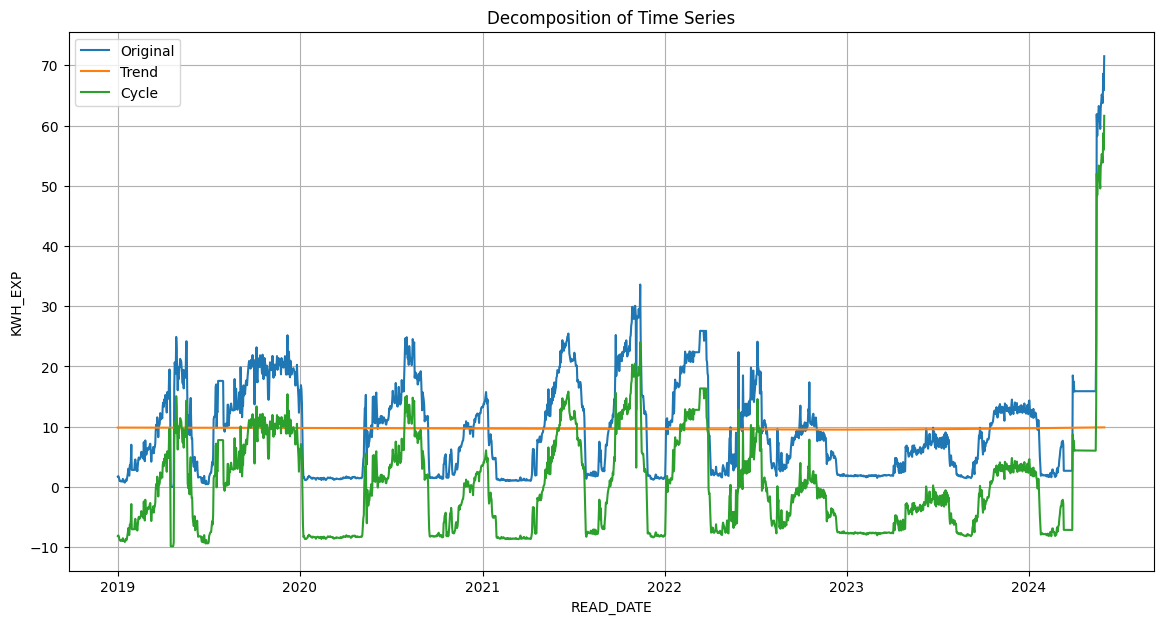

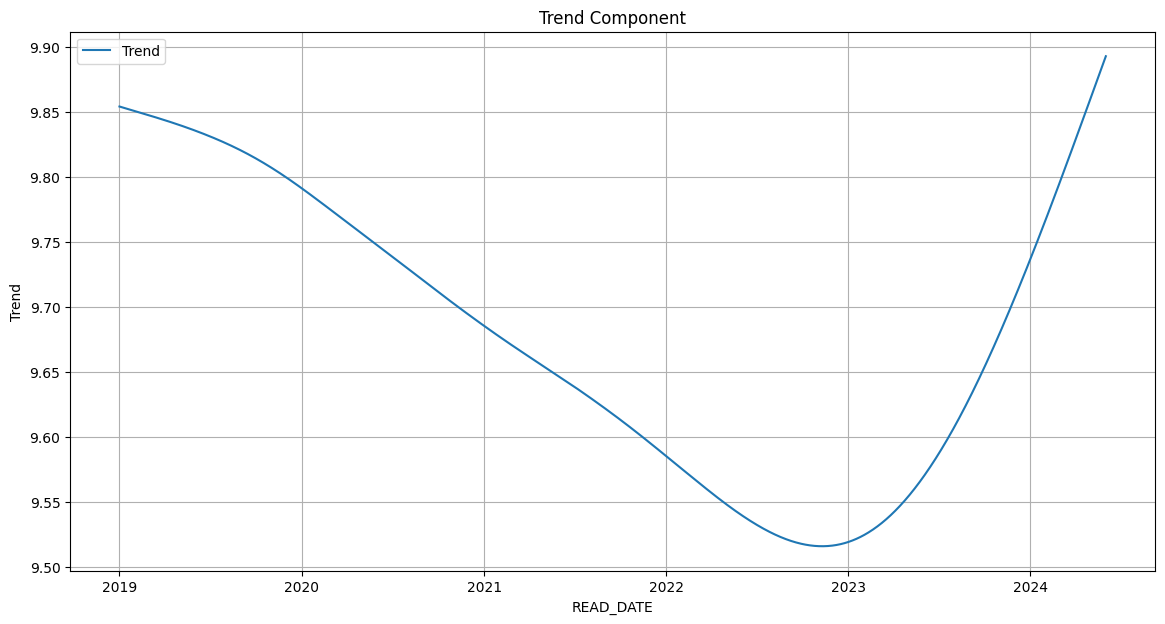

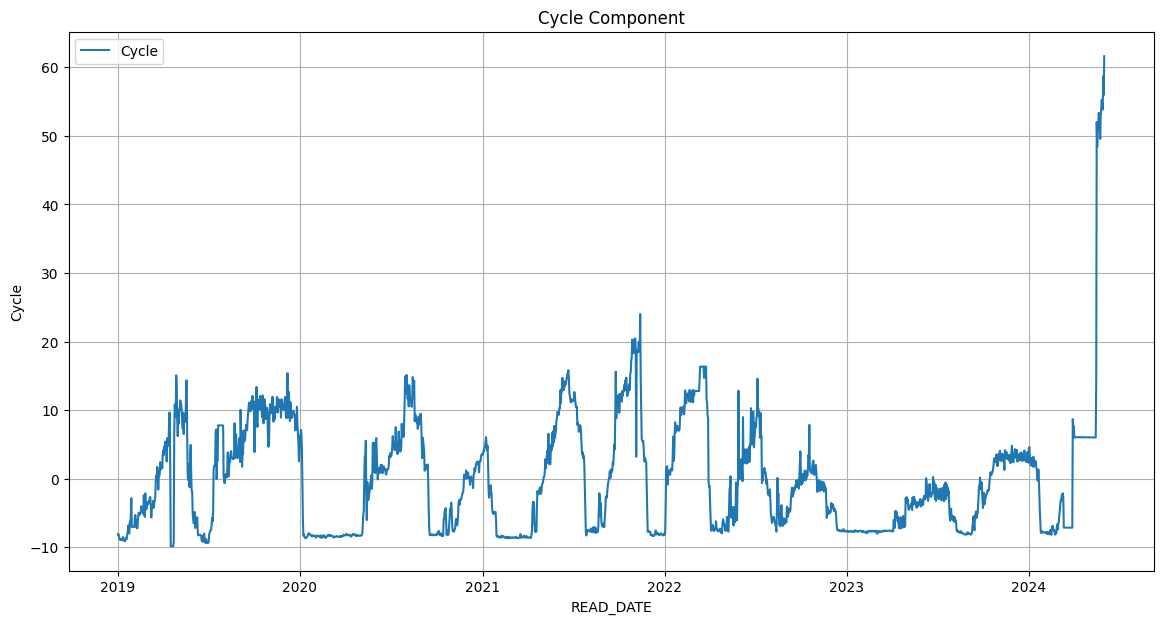

In [24]:
plot_decomposition(df_dec1)

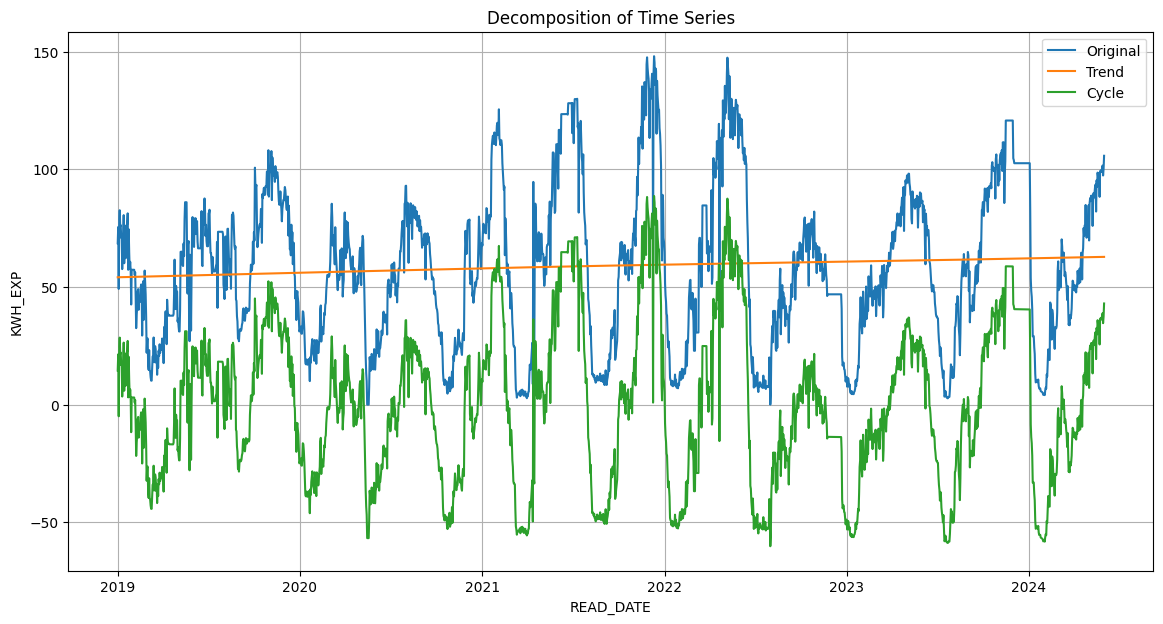

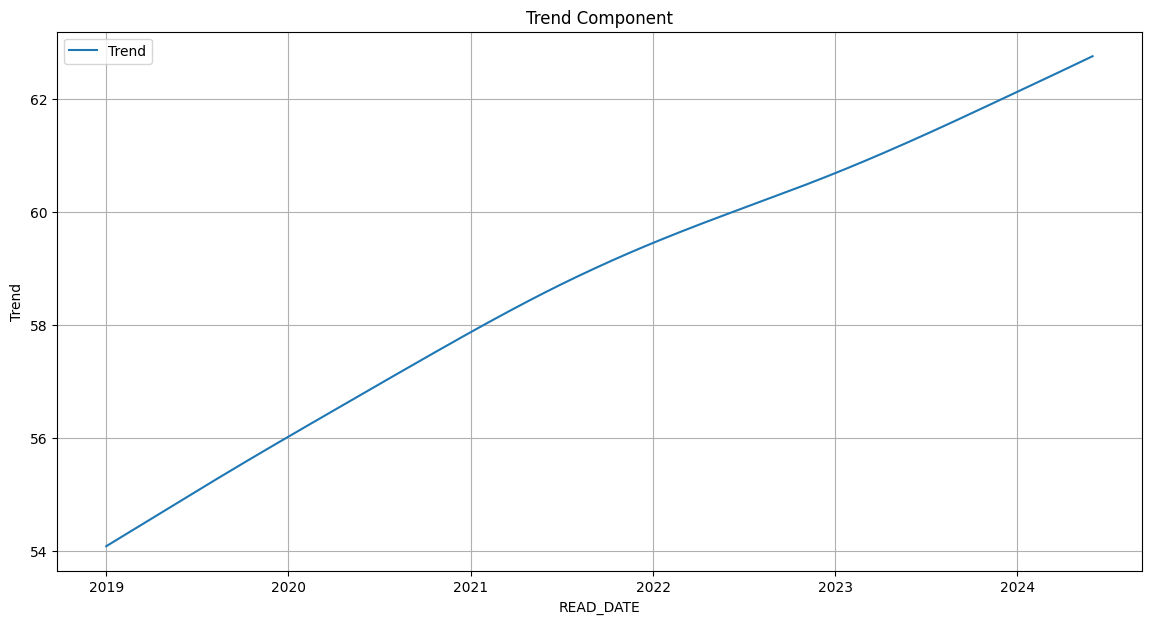

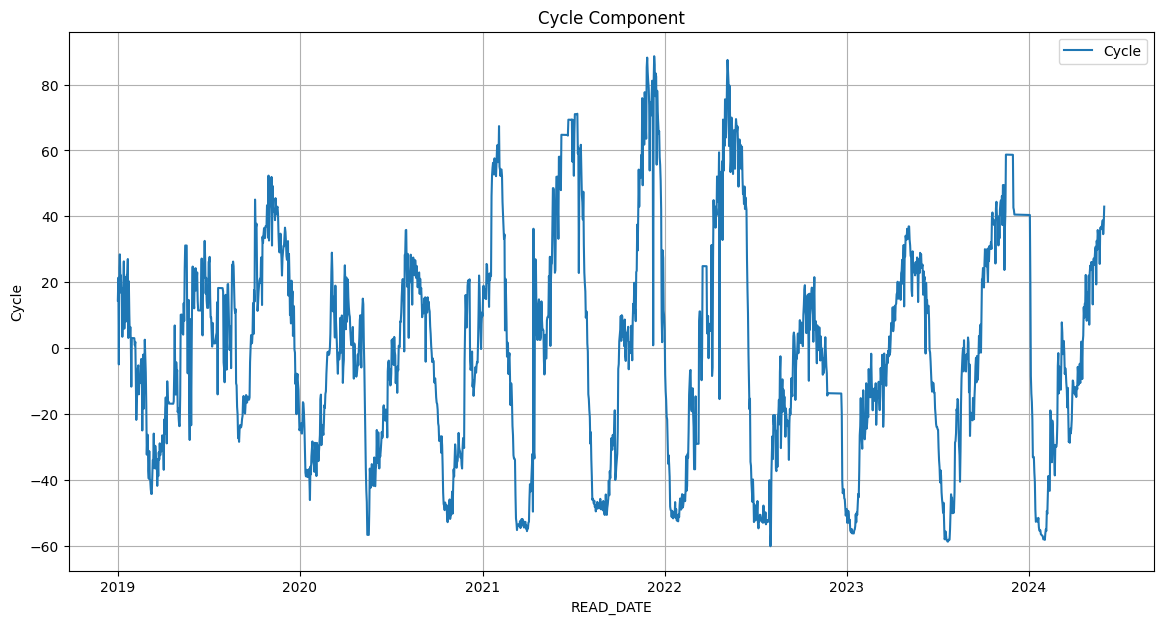

In [25]:
plot_decomposition(df_dec2)

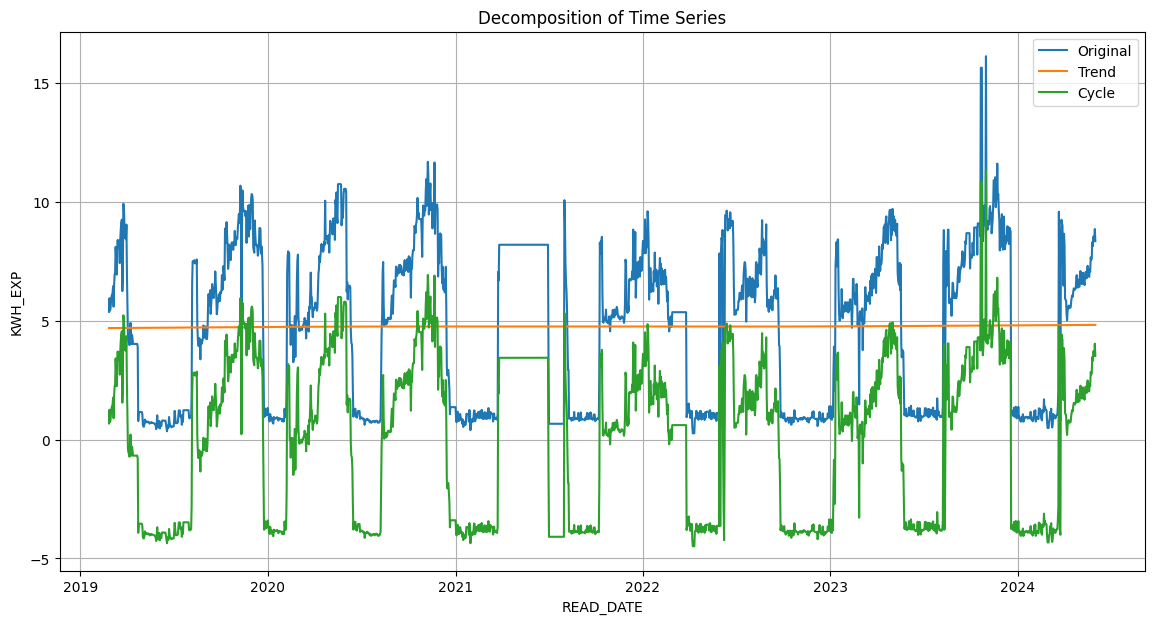

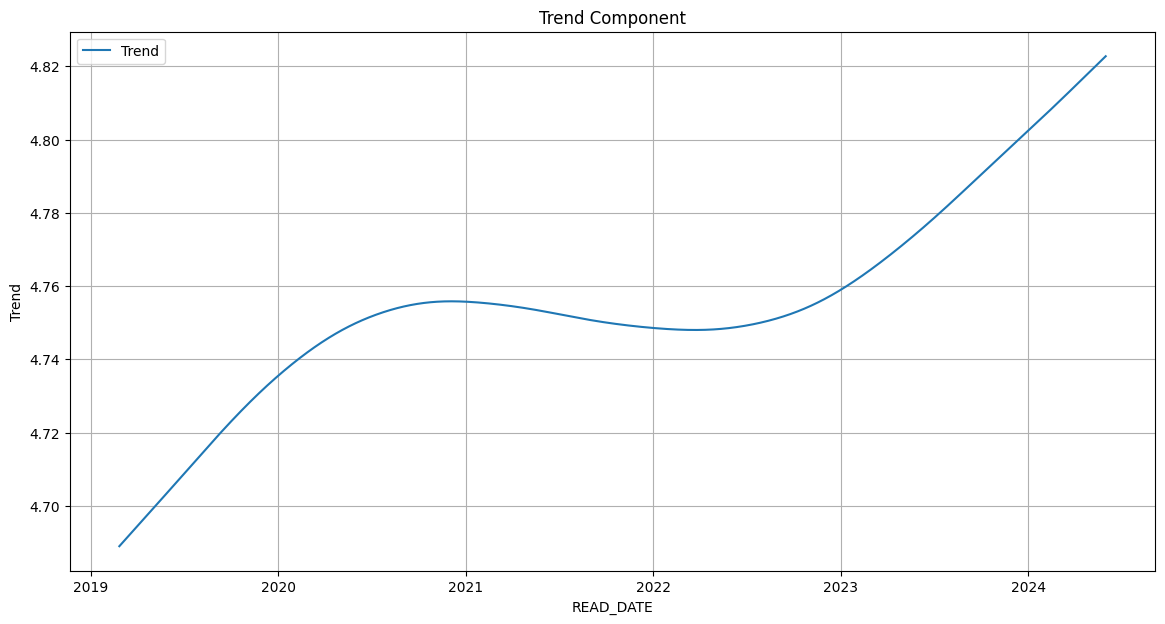

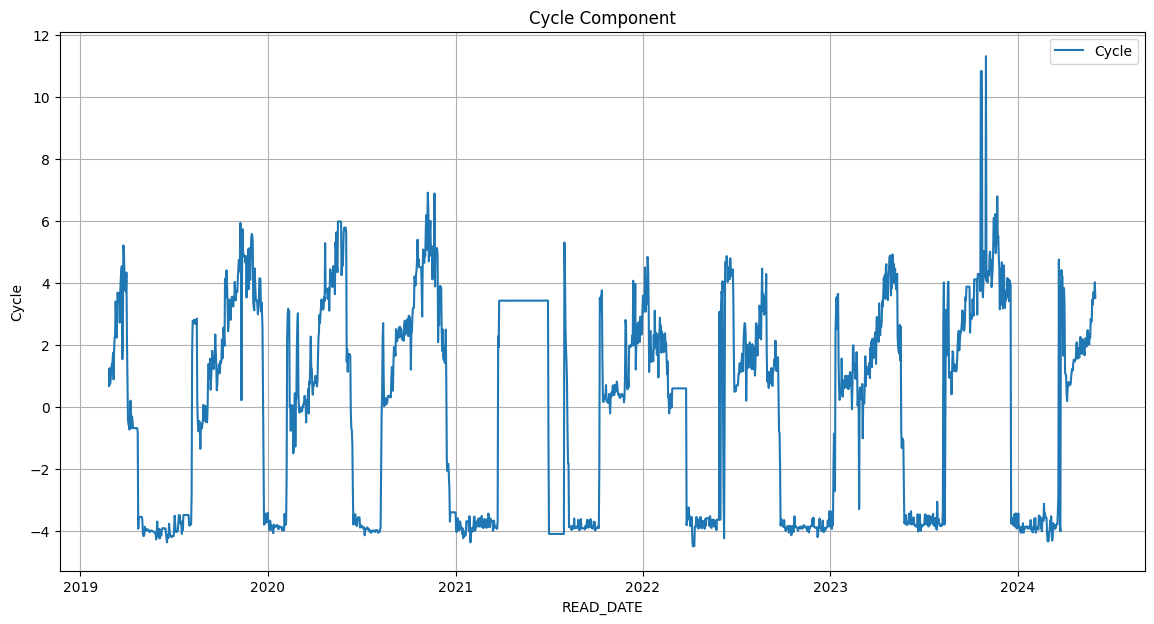

In [26]:
plot_decomposition(df_dec3)

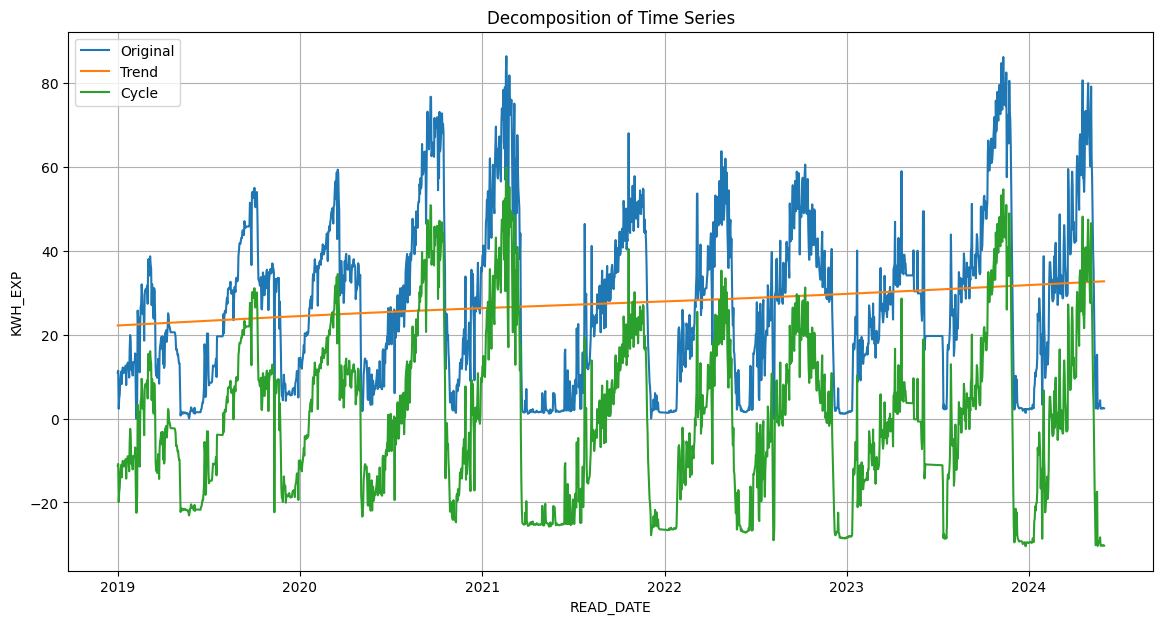

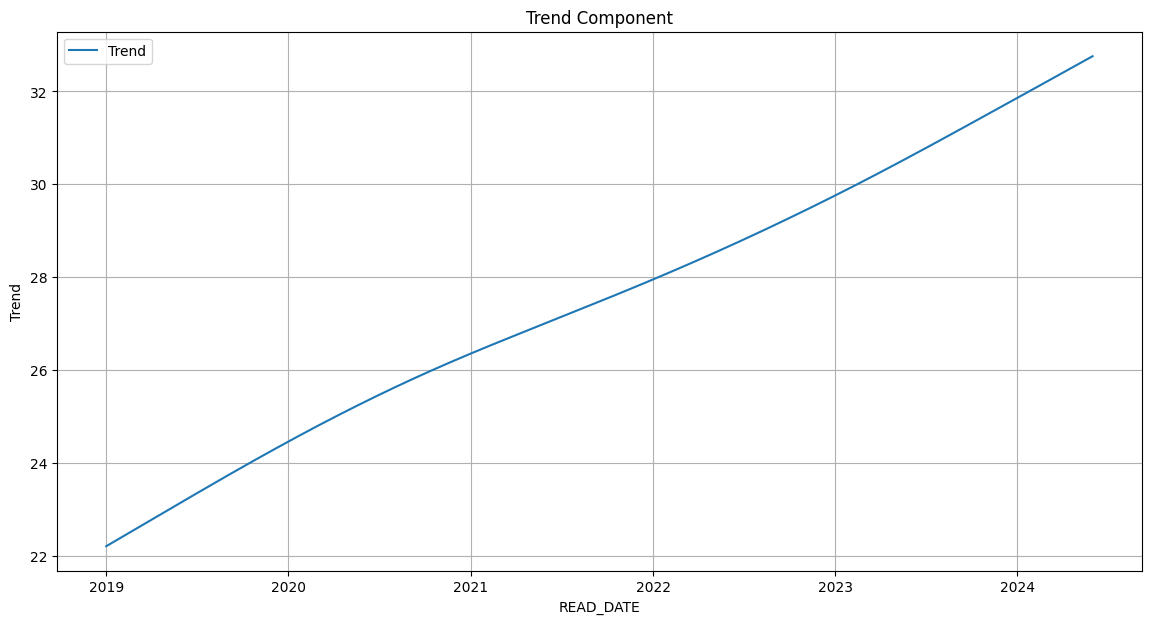

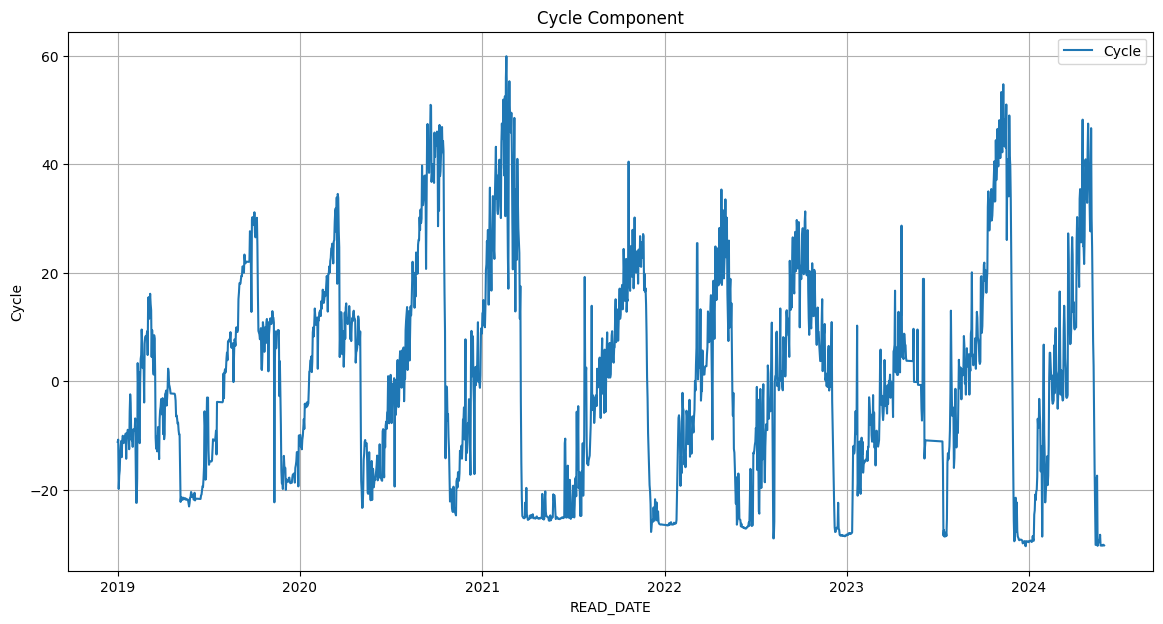

In [27]:
plot_decomposition(df_dec4)

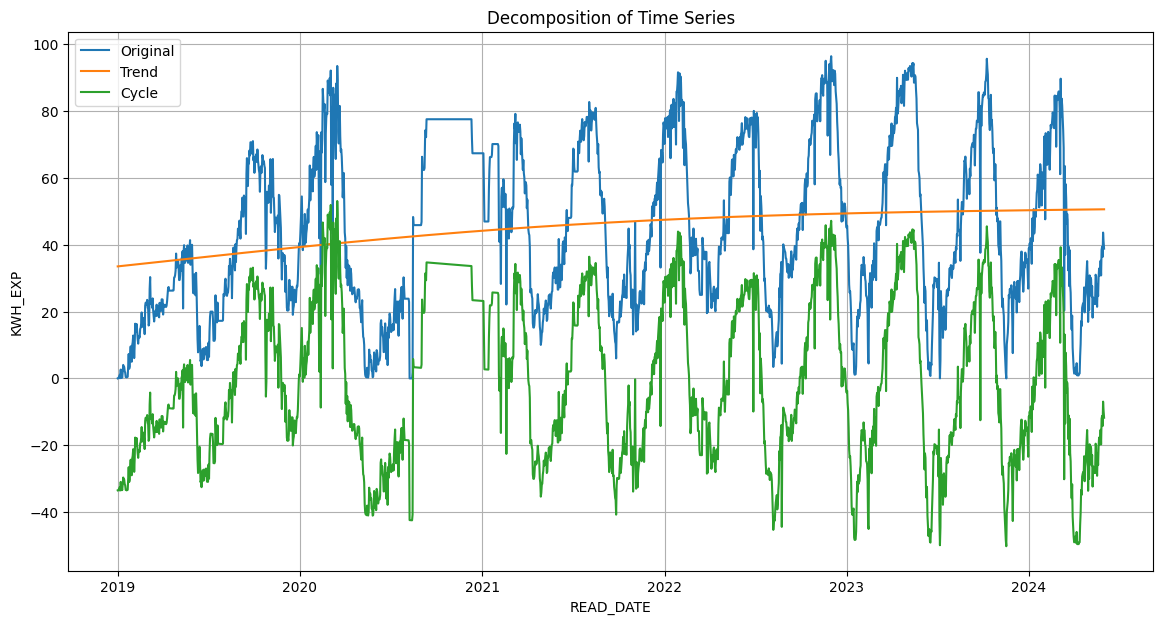

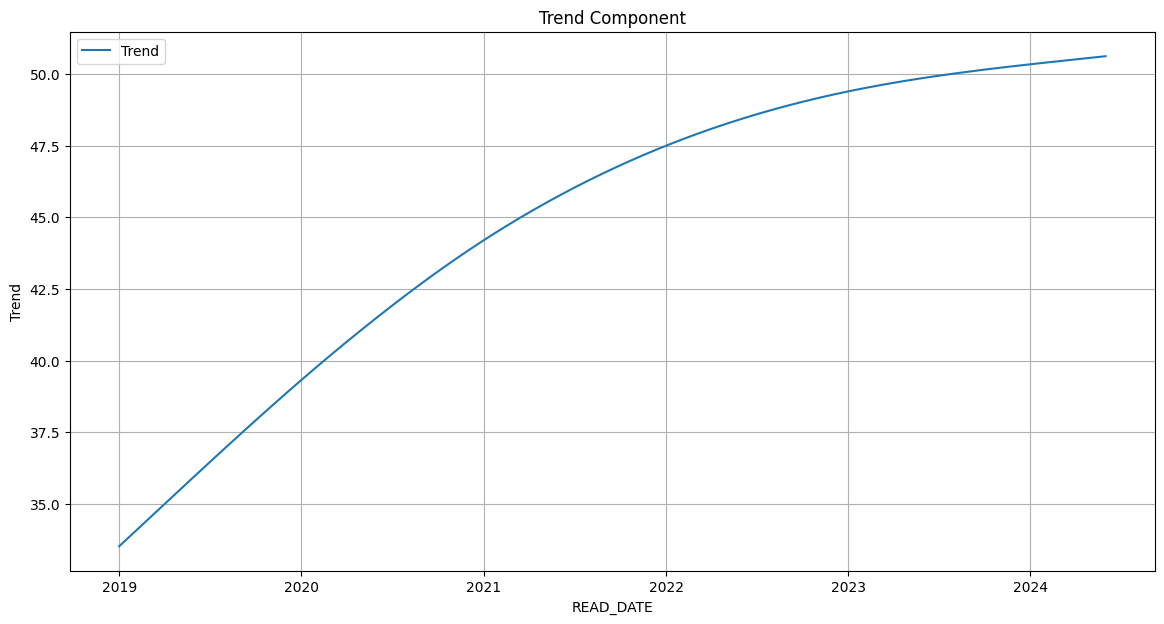

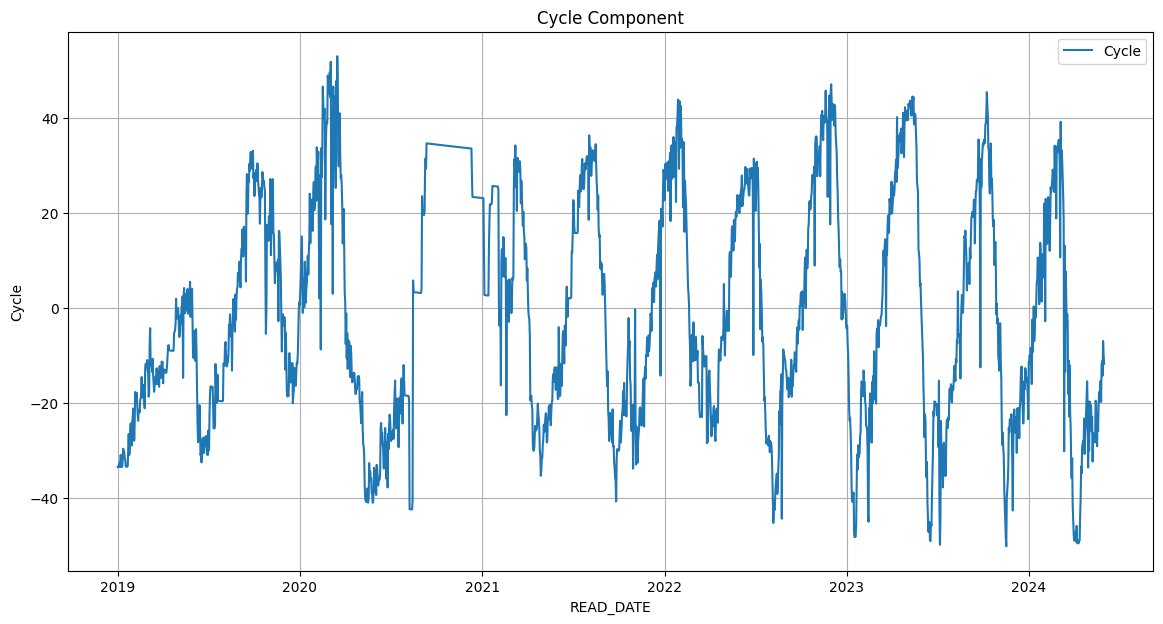

In [28]:
plot_decomposition(df_dec5)